# House_Price_Prediction

In [10]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [13]:
import os                        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# 1. Data Preprocessing

In [150]:
# helper function to print messages
def cprint(title, *args):
    print(
        "="*len(title), title, "="*len(title),
        *args,
        sep="\n",
    )

### Loading the datasets.

In [16]:
import chardet

# 파일의 인코딩 형식 확인
with open('/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/seoul_apart.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)


{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [22]:
import chardet
import pandas as pd

# 파일의 인코딩 형식 확인
file_path = '/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.txt'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"파일의 인코딩: {encoding}")

# 확인된 인코딩을 사용하여 파일 읽기
match_build_seoul = pd.read_csv(file_path, sep='|', encoding=encoding, header=None)

# 데이터 출력
print(match_build_seoul.head())


파일의 인코딩: CP949


/tmp/ipykernel_240366/682759409.py:13: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  match_build_seoul = pd.read_csv(file_path, sep='|', encoding=encoding)


   1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  94  0.1  03047  ...  \
0  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  96    0   3047  ...   
1  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  98    0   3047  ...   
2  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  99    3   3032  ...   
3  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  99    3   3032  ...   
4  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  99    4   3032  ...   

    953243.01328 1954025.806161  953241.683263  1954023.466812  Seoul  \
0  953247.695696   1.954041e+06  953243.258151    1.954034e+06  Seoul   
1  953248.552199   1.954060e+06  953240.877646    1.954055e+06  Seoul   
2  953194.413607   1.954068e+06  953195.459364    1.954079e+06  Seoul   
3  953183.480942   1.954081e+06  953195.459364    1.954079e+06  Seoul   
4  953188.419102   1.954103e+06  953193.346779    1.954097e+06  Seoul   

   Jongno-gu  Cheongun-dong  Jahamun-ro  1.2 Unnamed: 32  
0  Jongno-gu  Cheongun-dong  Jaha

In [18]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"
match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.txt"), sep='|', encoding='CP949', header=None, dtype=str)

In [ ]:
import pandas as pd

# Define the new column names
column_names = [
    "주소관할읍면동코드", "시도명", "시군구명", "읍면동명", "도로명코드", 
    "도로명", "지하여부", "건물본번", "건물부번", "우편번호", 
    "건물관리번호", "시군구용건물명", "건축물용도분류", "행정동코드", "행정동명", 
    "지상층수", "지하층수", "공동주택구분",'건물수', '상세건물명', '건물명변경이력', '상세건물명변경이력', '거주여부',
    '건물중심점_x좌표', '건물중심점_y좌표', '출입구_x좌표', '출입구_y좌표',
    '시도명(영문)', '시군구명(영문)', '읍면동명(영문)', '도로명(영문)',
    '읍면동구분', '이동사유코드'
]

# Assign these names to the DataFrame columns
match_build_seoul.columns = column_names

# Now you can work with your DataFrame as needed, for example:
print(match_build_seoul.head())  # Print the first 5 rows of the DataFrame to check everything is set correctly

# If you need to save the modified DataFrame back to a CSV
match_build_seoul.to_csv('match_build_seoul_modified.csv', index=False)  # index=False ensures that the DataFrame index is not written to the file


In [19]:
match_build_seoul['도로명주소'] = (
    match_build_seoul['시도명'].astype(str) + ' ' + 
    match_build_seoul['시군구명'].astype(str) + ' ' + 
    match_build_seoul['도로명'].astype(str) + ' ' + 
    match_build_seoul['건물본번'].astype(str) + 
    match_build_seoul['건물부번'].apply(lambda x: '' if x == 0 else '-' + str(x))
)
match_build_seoul.to_csv('match_build_seoul.csv', index=False)  

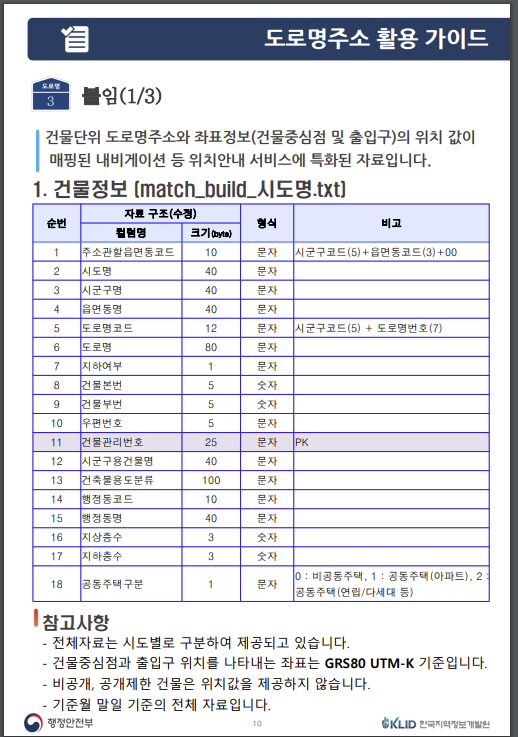 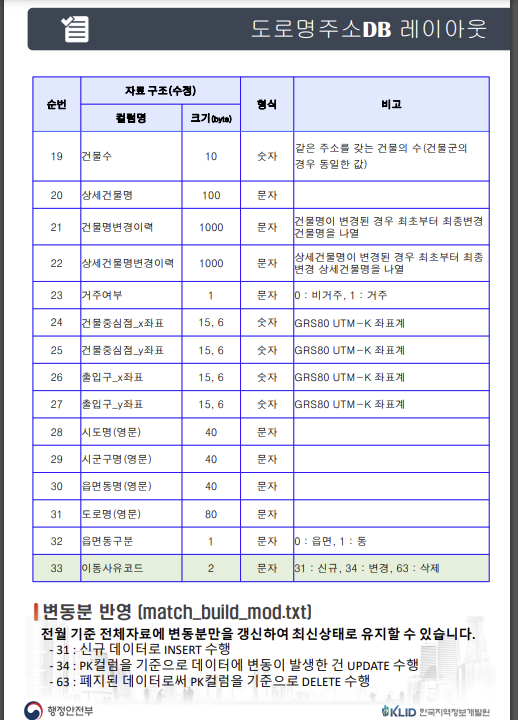

In [14]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"

train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
test = pd.read_csv(os.path.join(PATH, "test.csv")) # (9272, 51)
train_test = pd.read_csv(os.path.join(PATH, "train_test.csv")) # (1128094, 53)
train_test_final = pd.read_csv(os.path.join(PATH, "train_test_final.csv")) # 컬럼 추림
train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv")) # 
reconstruction = pd.read_csv(os.path.join(PATH, "reconstruction.csv"), encoding='CP949')
subway_feature = pd.read_csv(os.path.join(PATH, "subway_feature.csv"))
sample_submission = pd.read_csv(os.path.join(PATH, "sample_submission.csv"))
bus_feature = pd.read_csv(os.path.join(PATH, "bus_feature.csv"))
seoul_apart = pd.read_csv(r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/seoul_apart.csv")
# 출처: https://data.seoul.go.kr/dataList/OA-15818/S/1/datasetView.do 서울시 공동주택 아파트 정보
doroaddress = pd.read_csv(os.path.join(PATH, "doroaddress.csv")) # (8325, 7)
bunjiaddress = pd.read_csv(os.path.join(PATH, "bunjiaddress.csv")) # (8954, 1) 
# 출처: https://www.juso.go.kr/CommonPageLink.do?link=/support/AddressTransform 100만건 이하 주소전환
station_distance = pd.read_csv(os.path.join(PATH, "station_distance.csv"))
match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv"))

/tmp/ipykernel_276128/237772713.py:3: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
/tmp/ipykernel_276128/237772713.py:5: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_test = pd.read_csv(os.path.join(PATH, "train_test.csv")) # (1128094, 53)
/tmp/ipykernel_276128/237772713.py:7: DtypeWarning: Columns (17,18,37,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv"))
/tmp/ipykernel_276128/237772713.py:17: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv"))


In [16]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

In [59]:
train_test_final = train_test.drop(columns=['해제사유발생일','등기신청일자','거래유형','중개사소재지','k-전화번호','k-팩스번호','단지소개기존clob','k-세대타입(분양형태)','k-관리방식','k-난방방식','k-홈페이지','k-등록일자','k-수정일자','고용보험관리번호','경비비관리형태','세대전기계약방법','청소비관리형태','기타/의무/임대/임의=1/2/3/4','단지승인일','사용허가여부','관리비 업로드','단지신청일'])

In [61]:
train_test_final.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/train_test_final.csv')

In [72]:
train_test_final.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-복도유형,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,아파트,계단식,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0,262.0,127.05721,37.476763,124000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 3층,2017-12-08,강남구,개포동,서울특별시 강남구 언주로 3,2017


In [67]:
df = pd.merge(train_test_final, match_build_seoul, how='left', on='도로명주소')

In [69]:
df.shape

(16682654, 71)

In [27]:
# 테스트
import pyproj

# UTM-K 좌표계 정의
utm_k = pyproj.CRS('EPSG:5179')  # UTM-K 좌표계
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 좌표계 (위도/경도)

# 변환기 설정 (UTM-K에서 WGS84로 변환)
transformer = pyproj.Transformer.from_crs(utm_k, wgs84, always_xy=True)

# 변환할 UTM-K 좌표 (서울특별시 대략적인 UTM-K 좌표)
#x = match_build_seoul[(match_build_seoul['공동주택구분']==1)&(match_build_seoul['도로명주소']=='서울특별시 강남구 언주로 3')]['건물중심점_x좌표']  # 대략적인 UTM-K X 좌표
x = 960679.207519
y = 1.942024e+06  # 대략적인 UTM-K Y 좌표

# 좌표 변환 (UTM-K -> WGS84)
longitude, latitude = transformer.transform(x, y)

print(f"위도: {latitude}, 경도: {longitude}") # 위도: 37.476607957178274, 경도: 127.05528456855924


위도: 37.476607957178274, 경도: 127.05528456855924


In [50]:
df = train_test_final[['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일',
       '층', '건축년도', '도로명','target',
       'is_test', '번지주소', 'id', '계약년월일', '구', '동', '도로명주소', '계약년']]

In [55]:
df.shape

(1128094, 20)

## seoul_apart에서 중복된 행을 찾아서 reconstruction으로 만들고 이를 reconstrunction_modified로 중복제거해줌.
seoul_apart에서 중복된 행을 제외한 것 + reconstrunction_modified + train에 중복되지만 아파트명과 숫자가 겹치는 것으로 확인

In [116]:
no_duplicated_seoul_apart = seoul_apart[~seoul_apart.duplicated(subset=['kapt도로명주소'], keep=False)]

In [117]:
no_duplicated_seoul_apart.shape

(2605, 22)

In [118]:
seoul_apart_new = pd.concat([no_duplicated_seoul_apart, reconstruction_modified], ignore_index=True)

In [119]:
train_test_seoul_apart = pd.merge(train_test_final, seoul_apart_new, left_on='도로명주소', right_on='kapt도로명주소', how='left' )

In [120]:
train_test_seoul_apart.shape

(1128179, 62)

In [121]:
train_test_final.shape

(1128094, 39)

In [130]:
train_test_seoul_apart_no_matching = train_test_seoul_apart[~train_test_seoul_apart['kapt도로명주소'].isin(train_test_final['도로명주소'])][['도로명주소','아파트명','kapt도로명주소']].drop_duplicates()


In [132]:
train_test_seoul_apart_no_matching.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/train_test_seoul_apart_no_matching.csv', index=False)

In [133]:
train_test_seoul_apart_no_matching

,도로명주소,아파트명,kapt도로명주소
44,서울특별시 강남구 선릉로 7,개포주공1단지,NaN
242,서울특별시 강남구 개포로 516,개포주공6단지,NaN
986,서울특별시 강남구 개포로 516,개포주공7단지,NaN
1031,서울특별시 강남구 언주로 105,개포현대200동,NaN
1063,서울특별시 강남구 논현로2길 61-4,뉴현대파크빌,NaN
...,...,...,...
1120265,서울특별시 강북구 도봉로73길 13,수유시그니티,NaN
1121033,서울특별시 광진구 뚝섬로52길 7,그랜드,NaN
1121324,서울특별시 구로구 경서로 17,더헤리츠,NaN
1123633,서울특별시 마포구 토정로17길 6,신수동르끌레브,NaN


In [56]:
seoul_apart.shape

(2791, 22)

In [59]:
seoul_apart.kapt도로명주소.unique().shape

(2697,)

In [60]:
# 중복된 행 찾기
duplicate_rows = seoul_apart[seoul_apart.duplicated(subset=['kapt도로명주소'], keep=False)]


In [62]:
reconstruction = duplicate_rows

In [90]:
reconstruction.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/reconstruction.csv', index=False, encoding='CP949')

In [77]:
train_test_final[(train_test_final['아파트명'].str.contains('우성')==True)&(train_test_final['건축년도']==1996)&(train_test_final['도로명'].str.contains('서초구')==True)]

,Unnamed: 0,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-복도유형,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년


In [91]:
train_test_final[(train_test_final['도로명주소'].str.contains('서울특별시 노원구 덕릉로 753'))]

,Unnamed: 0,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-복도유형,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년


In [112]:
train_test_final[(train_test_final['도로명주소'].str.contains('서울특별시 강서구 강서로68길 36')==True)].아파트명.unique()

array(['등촌1,2단지주공'], dtype=object)

In [ ]:
train_test_final

In [113]:
reconstruction_modified = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/reconstruction_modified.csv', encoding='CP949')

In [114]:
reconstruction_modified

,번호,k-아파트코드,2,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
0,457,A15882008,목동현대1차,아파트,서울특별시 양천구 목동동로 240,양천구,목동,목동동로,3,242,현대건설(주),1997-12-06,26145,17495.0,25920,122.0,120.0,0.0,NaN,198,126.872706,37.525996
1,653,A13813007,오금아남,아파트,서울특별시 송파구 성내천로6길 1-13,송파구,오금동,성내천로6길,2,299,아남건설,1992-09-04,28198,19825.0,27604,120.0,179.0,0.0,NaN,165,127.136112,37.502892
2,779,A13085901,전농동아,아파트,서울특별시 동대문구 서울시립대로 31,동대문구,전농동,서울시립대로,2,360,동아건설,1997-12-22,35595,27072.0,35595,169.0,128.0,63.0,NaN,308,127.045838,37.574967
3,840,A13402002,천호태영,아파트,서울특별시 강동구 천호대로 1055,강동구,천호동,천호대로,5,385,태영건설,1999-11-20,58613,34313.0,34313,80.0,183.0,122.0,NaN,435,127.130007,37.538154
4,849,A15683901,상도쌍용,아파트,서울특별시 동작구 상도로 107,동작구,상도동,상도로,6,389,쌍용건설,2003-11-20,40422,32290.0,40122,124.0,179.0,86.0,NaN,452,126.931646,37.501547
5,872,A15004504,당산센트럴아이파크,아파트,서울특별시 영등포구 영신로 247,영등포구,당산동5가,영신로,4,400,동성종합건설,1983-07-29,39197,28772.0,37501,208.0,144.0,48.0,NaN,166,126.903625,37.530088
6,909,A13302203,하왕극동미라주,아파트,서울특별시 성동구 난계로 73,성동구,하왕십리동,난계로,3,414,극동건설,2001-12-14,59337,34387.0,34387,136.0,180.0,98.0,NaN,457,127.023361,37.558517
7,959,A13592601,역삼개나리래미안,아파트,서울특별시 강남구 역삼로 306,강남구,역삼동,역삼로,7,438,삼성,2006-08-31,93113,44847.0,57362,88.0,133.0,143.0,NaN,771,127.045748,37.498326
8,976,A15703301,등촌8단지주공아파트,아파트,서울특별시 강서구 공항대로43길 104,강서구,등촌동,공항대로43길,5,445,주택공사,1994-11-04,26126,18623.0,25288,445.0,0.0,0.0,NaN,176,126.851377,37.561287
9,1006,A13302204,하왕금호베스트빌,아파트,서울특별시 성동구 난계로 114-31,성동구,하왕십리동,난계로,6,458,금호건설,2001-10-05,70296,39538.0,52607,137.0,185.0,136.0,NaN,523,127.025497,37.561295


## reconstruction 안에서 중복되고 train_test에는 없어서 삭제해야 하는 아파트코드 
A13789201 : 같은 지역에 한 동만 따로 관리됨 양재우성KBS(113동)
A13790905	반포르엘	아파트	서울특별시 서초구 신반포로23길 23 재건축 전 데이터
A13780001	래미안원펜타스	아파트	서울특별시 서초구 신반포로15길 1	재건축 전 데이터
A14207201	래미안수유임대	아파트	서울특별시 강북구 한천로159길 8 재건축 전 데이터
A12180404	공덕삼성임대	아파트	서울특별시 마포구 마포대로 115-8 재건축 전 데이터




In [78]:
reconstruction

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
5,7,A13789201,양재우성KBS(113동),아파트,서울특별시 서초구 바우뫼로 91,서초구,양재동,바우뫼로,1,150,우성건설,1996-12-31,16533.0,12704.0,16533.0,0.0,150.0,0.0,NaN,97.0,127.0290739,37.477501
149,155,A13790905,반포르엘,아파트,서울특별시 서초구 신반포로23길 23,서초구,잠원동,신반포로23길,1,178,한신공영(주),2022-08-00,20673.0,18697.0,20559.0,0.0,0.0,178.0,NaN,172.0,127.002301,37.508793
161,167,A13780001,래미안원펜타스,아파트,서울특별시 서초구 신반포로15길 1,서초구,반포동,신반포로15길,8,180,한신공영(주),1982-06-26,37995.0,28662.0,35397.0,0.0,0.0,30.0,NaN,31.0,126.9936943,37.503832
166,172,A14207201,래미안수유임대,아파트,서울특별시 강북구 한천로159길 8,강북구,수유동,한천로159길,1,180,삼성물산,2001-11-29,13213.0,5897.0,13213.0,180.0,0.0,0.0,NaN,126.0,127.0181926,37.644796
391,400,A12180404,공덕삼성임대,아파트,서울특별시 마포구 마포대로 115-8,마포구,공덕동,마포대로,1,226,삼성건설,1999-10-16,13392.0,7406.0,13388.0,226.0,0.0,0.0,NaN,77.0,126.950904,37.548075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,40363,A10023060,노원롯데캐슬시그니처2단지,아파트,서울특별시 노원구 덕릉로 753,노원구,상계동,덕릉로,6,610,롯데건선,2023-06-28,89035.0,43116.0,43117.0,351.0,255.0,4.0,NaN,752.0,127.0777624,37.665161
2774,40368,A10023024,노원롯데캐슬시그니처1단지,아파트,서울특별시 노원구 덕릉로 753,노원구,상계동,덕릉로,4,553,롯데건설(주),2023-06-28,74571.0,35725.0,48263.0,304.0,218.0,31.0,NaN,665.0,127.0777624,37.665161
2780,40387,A10022859,디에이치퍼스티어아이파크,아파트,서울특별시 강남구 개포로 310,강남구,개포동,개포로,74,6702,"현대산업개발, 현대건설",2023-11-29,1306341.0,570727.0,570727.0,NaN,NaN,NaN,NaN,13154.0,127.057848,37.480287
2788,40407,A10022649,송파더플래티넘,아파트,서울특별시 송파구 성내천로6길 1-13,송파구,오금동,성내천로6길,2,328,주식회사쌍용,2024-01-30,49938.0,27601.0,36255.0,30.0,119.0,179.0,NaN,320.0,127.1363056,37.503297


In [84]:
test.계약년월.min()


np.int64(202307)

In [85]:
test.계약년월.max()

np.int64(202309)

In [88]:
reconstruction[reconstruction['kapt도로명주소']=='서울특별시 마포구 마포대로 115-8']

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
391,400,A12180404,공덕삼성임대,아파트,서울특별시 마포구 마포대로 115-8,마포구,공덕동,마포대로,1,226,삼성건설,1999-10-16,13392.0,7406.0,13388.0,226.0,0.0,0.0,NaN,77.0,126.950904,37.548075
1232,1268,A12180407,공덕삼성,아파트,서울특별시 마포구 마포대로 115-8,마포구,공덕동,마포대로,5,651,삼성물산,1999-10-16,89512.0,53512.0,71155.0,230.0,287.0,134.0,NaN,658.0,126.9514816,37.546801


In [51]:
train_test_seoul_apart = pd.merge(df, seoul_apart, left_on='도로명주소', right_on='kapt도로명주소',how='left')

In [54]:
train_test_seoul_apart.shape

(1207575, 42)

In [ ]:
train_test_seoul_apart[train_test_seoul_apart['도로명주소']=='서울특별시 강남구 삼성로 150'] # 127.05721	37.476763

In [64]:
train_test_seoul_apart.shape

(1207575, 42)

In [ ]:
# 테스트 UTM-K -> WGS84
import pyproj

# UTM-K 좌표계 정의
utm_k = pyproj.CRS('EPSG:5179')  # UTM-K 좌표계
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 좌표계 (위도/경도)

# 변환기 설정 (UTM-K에서 WGS84로 변환)
transformer = pyproj.Transformer.from_crs(utm_k, wgs84, always_xy=True)

# 변환할 UTM-K 좌표 (서울특별시 대략적인 UTM-K 좌표)
x = match_build_seoul[(match_build_seoul['공동주택구분']==1)]['건물중심점_x좌표']  # 대략적인 UTM-K X 좌표
y = match_build_seoul[(match_build_seoul['공동주택구분']==1)]['건물중심점_y좌표']  # 대략적인 UTM-K X 좌표


# 좌표 변환 (UTM-K -> WGS84)
longitude, latitude = transformer.transform(x, y)

print(f"위도: {latitude}, 경도: {longitude}") # 위도: 37.476607957178274, 경도: 127.05528456855924


In [ ]:
# UTM-K -> WGS84

import pyproj
import pandas as pd

# UTM-K 좌표계 정의
utm_k = pyproj.CRS('EPSG:5179')  # UTM-K 좌표계
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 좌표계 (위도/경도)

# 변환기 설정 (UTM-K에서 WGS84로 변환)
transformer = pyproj.Transformer.from_crs(utm_k, wgs84, always_xy=True)

# 변환 함수 정의
def transform_coordinates(row):
    longitude, latitude = transformer.transform(row['건물중심점_x좌표'], row['건물중심점_y좌표'])
    #longitude, latitude = transformer.transform(row['출입구_x좌표'], row['출입구_y좌표'])
    return pd.Series([longitude, latitude])

# 데이터프레임에 새로운 열 추가
match_build_seoul[['건물중심점_x좌표_wgs84', '건물중심점_y좌표_wgs84']] = match_build_seoul.apply(transform_coordinates, axis=1)
#match_build_seoul[['출입구_x좌표_wgs84', '출입구_y좌표_wgs84']] = match_build_seoul.apply(transform_coordinates, axis=1)

print(match_build_seoul)


In [40]:
match_build_seoul.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.csv', index=False)

In [ ]:
match_build_seoul.head(3)

In [43]:
match_build_seoul[(match_build_seoul['공동주택구분']==1)&(match_build_seoul['도로명주소']=='서울특별시 강남구 삼성로 150')][['도로명주소','']]

,주소관할읍면동코드,시도명,시군구명,읍면동명,도로명코드,도로명,지하여부,건물본번,건물부번,우편번호,건물관리번호,시군구용건물명,건축물용도분류,행정동코드,행정동명,지상층수,지하층수,공동주택구분,건물수,상세건물명,건물명변경이력,상세건물명변경이력,거주여부,건물중심점_x좌표,건물중심점_y좌표,출입구_x좌표,출입구_y좌표,시도명(영문),시군구명(영문),읍면동명(영문),도로명(영문),읍면동구분,이동사유코드,도로명주소,건물중심점_x좌표_wgs84,건물중심점_y좌표_wgs84,출입구_x좌표_wgs84,출입구_y좌표_wgs84
543436,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014289,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,208,NaN,NaN,1,961863.116562,1.944136e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.068565,37.495695,127.064106,37.493378
543437,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014303,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,201,NaN,NaN,1,961757.523332,1.944098e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.067372,37.495346,127.064106,37.493378
543438,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014311,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,209,NaN,NaN,1,961888.063098,1.944076e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.068850,37.495150,127.064106,37.493378
543440,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014329,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,202,NaN,NaN,1,961785.934555,1.944025e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.067697,37.494694,127.064106,37.493378
543441,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014335,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,210,NaN,NaN,1,961910.326358,1.944013e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.069105,37.494588,127.064106,37.493378
543443,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014357,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,203,NaN,NaN,1,961807.184963,1.943964e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.067941,37.494143,127.064106,37.493378
543444,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014364,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,211,NaN,NaN,1,961934.094727,1.943951e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.069377,37.494028,127.064106,37.493378
543445,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014377,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,107,NaN,NaN,1,961671.156342,1.943935e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.066404,37.493878,127.064106,37.493378
543446,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014392,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,205,NaN,NaN,1,961830.148162,1.943903e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.068204,37.493591,127.064106,37.493378
543447,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014394,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,101,NaN,NaN,1,961543.676734,1.943901e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.064963,37.493565,127.064106,37.493378


## read_csv 만들기 위한 데이터전처리 과정 --> 완료

### bunjiaddress

In [ ]:
import pandas as pd

# Assuming 'train_test' is your DataFrame
# Extract unique values from '번지주소' column and convert them to a DataFrame
unique_addresses = pd.DataFrame(train_test['번지주소'].unique(), columns=['Unique Addresses'])

# Save to a CSV file with cp949 encoding, no index, and no header
unique_addresses.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='cp949', index=False, header=False)


In [ ]:
doroaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\도로명주소.txt", encoding='cp949') # 
bunjiaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='cp949') # 

doroaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\도로명주소.txt", encoding='utf-8', index=False)
bunjiaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='utf-8', index=False)


In [152]:
bunjiaddress.rename(columns={0:'번지주소'}, inplace=True)

In [153]:
bunjiaddress = bunjiaddress.drop(bunjiaddress.columns[0], axis=1)

In [ ]:
bunjiaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='cp949', header=None) #  


In [ ]:
bunjiaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\bunjiaddress.csv", index=False)

In [245]:
bunjiaddress

,번지주소
0,서울특별시 강남구 개포동 658-1
1,서울특별시 강남구 개포동 652
2,서울특별시 강남구 개포동 12-2
3,서울특별시 강남구 개포동 141
4,서울특별시 강남구 개포동 187
...,...
8949,서울특별시 동작구 흑석동 253-89
8950,서울특별시 마포구 신수동 400-1
8951,서울특별시 성동구 송정동 67-5
8952,서울특별시 중구 인현동2가 240


In [246]:
bunjiaddress[bunjiaddress['번지주소'].isna()]

,번지주소
3578,NaN


In [ ]:
bunjiaddress.drop()

### doroaddress

In [ ]:
column_names = ['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호']
doroaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\도로명주소.txt", delimiter=';', names=column_names, on_bad_lines='warn')

In [ ]:
doroaddress = doroaddress.drop(doroaddress.index[0])

In [ ]:
doroaddress = doroaddress.drop(doroaddress.columns[0], axis=1)

In [405]:
doroaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\doroaddress.csv", index=False)

In [221]:
doroaddress['동'] = doroaddress['도로명주소'].str.extract(r'\((.*?)\)')

In [223]:
doroaddress['도로명주소'] = doroaddress['도로명주소'].str.replace(r'\s*\(.*?\)', '', regex=True)

In [310]:
print(doroaddress['우편번호'].dtype)

float64


In [403]:
doroaddress

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
0,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동,서울특별시 강남구 개포동 언주로 3
1,전환성공,6319.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,1168010300106520000019285,개포동,서울특별시 강남구 개포동 개포로 307
2,전환성공,6334.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,1168010300100120002000001,개포동,서울특별시 강남구 개포동 개포로109길 69
3,자료없음,0.0,서울특별시 강남구 개포동 141,NaN,NaN,NaN,NaN
4,전환성공,6330.0,서울특별시 강남구 개포동 185,서울특별시 강남구 개포로 516,1168010300101850000019804,개포동,서울특별시 강남구 개포동 개포로 516
...,...,...,...,...,...,...,...
8325,전환성공,6321.0,서울특별시 강남구 개포동 141,서울특별시 강남구 개포로 310,1168010300106600001019979,개포동,서울특별시 강남구 개포동 개포로 310
8326,전환성공,6329.0,서울특별시 강남구 개포동 187,서울특별시 강남구 삼성로4길 17,1168010300101870000019798,개포동,서울특별시 강남구 개포동 삼성로4길 17
8327,전환성공,6284.0,서울특별시 강남구 대치동 316,서울특별시 강남구 삼성로 212,1168010600103160000014554,대치동,서울특별시 강남구 대치동 삼성로 212
8328,전환성공,6798.0,서울특별시 서초구 서초동 1326,서울특별시 서초구 서운로 122,1165010800113260000022501,서초동,서울특별시 서초구 서초동 서운로 122


In [303]:
doroaddress['우편번호']

0       06316
1       06319
2       06334
3       00000
4       06330
        ...  
8318    06987
8319    04088
8320    04802
8321    04548
8322    04544
Name: 우편번호, Length: 8323, dtype: object

In [302]:
# to_csv로 저장해서 불러오면 다시 float64가 됨
def format_postcode(x):
    try:
        # 숫자로 변환, 오류 시 NaN 반환
        num = pd.to_numeric(x, errors='coerce')
        if np.isnan(num):  # NaN 체크
            return None     # 원하는 기본값으로 설정
        return f"{int(num):05}"
    except Exception as e:
        print(f"Error converting {x}: {e}")
        return None  # 오류가 발생했을 때 반환할 값

# apply 함수로 각 요소에 적용
doroaddress['우편번호'] = doroaddress['우편번호'].apply(format_postcode)

In [279]:
doroaddress[doroaddress['동'].isna()]

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
3,자료없음,0.0,서울특별시 강남구 개포동 141,NaN,NaN,NaN,None
223,자료없음,0.0,서울특별시 강남구 삼성동 19-4,NaN,NaN,NaN,None
295,자료없음,0.0,서울특별시 강남구 압구정동 443,NaN,NaN,NaN,None
305,자료없음,0.0,서울특별시 강남구 역삼동 712,NaN,NaN,NaN,None
407,자료없음,0.0,서울특별시 강남구 일원동 690-1,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...
8302,자료없음,0.0,서울특별시 강남구 역삼동 763,NaN,NaN,NaN,None
8308,자료없음,0.0,서울특별시 서초구 반포동 16-1,NaN,NaN,NaN,None
8309,자료없음,0.0,서울특별시 서초구 서초동 1686-4,NaN,NaN,NaN,None
8310,자료없음,0.0,서울특별시 용산구 한강로2가 196,NaN,NaN,NaN,None


In [357]:
## 동도로명주소

import pandas as pd

# 새로운 주소 컬럼 생성
def create_full_address(row):
    if pd.isna(row['도로명주소']):  # 주소가 NaN인지 확인
        return None  # NaN 값이면 None 반환
    
    parts = row['도로명주소'].split()  # 주소를 공백으로 분할
    new_parts = []
    insert_position = -1  # '동'을 삽입할 위치

    # '서'로 시작하고 '구'로 끝나는 부분까지 new_parts에 추가
    for i, part in enumerate(parts):
        new_parts.append(part)
        if part.endswith('구'):
            insert_position = i + 1  # '구' 다음 위치에 '동' 삽입
            break

    # '동' 삽입
    if insert_position != -1:  # 적절한 삽입 위치가 있으면
        new_parts.insert(insert_position, row['동'])  # '동'을 삽입
        new_parts.extend(parts[insert_position:])  # 나머지 주소 부분 추가

    return ' '.join(new_parts)  # 분할된 파트를 다시 조합

# apply 함수를 사용하여 각 행에 함수 적용
doroaddress['동도로명주소'] = doroaddress.apply(create_full_address, axis=1)

print(doroaddress)


      결과코드    우편번호                 지번주소                   도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1         서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652       서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2    서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                     NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185       서울특별시 강남구 개포로 516   
...    ...     ...                  ...                     ...   
8320  전환성공  4802.0   서울특별시 성동구 송정동 67-5        서울특별시 성동구 송정길 32   
8321  전환성공  4548.0   서울특별시 중구 인현동2가 240        서울특별시 중구 마른내로 79   
8322  전환성공  4544.0     서울특별시 중구 입정동 277      서울특별시 중구 을지로15길 31   
8323  전환성공  6800.0    서울특별시 서초구 내곡동 384  서울특별시 서초구 내곡동 헌릉로8길 45   
8324  전환성공  6798.0    서울특별시 서초구 신원동 557   서울특별시 서초구 헌릉로8길 10-12   

                         건물관리번호      동                      동도로명주소  
0     1168010300106580001019759    개포동         서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285    개포동       서울특별시 강남구 개포

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

### train_test

In [ ]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
train['is_test'] = 0
test['is_test'] = 1
train_test = pd.concat([train, test])     # 하나의 데이터로 만들어줍니다.

In [ ]:
train_test['번지주소'] = train_test['시군구'] + ' ' + train_test['번지']

In [165]:
train_test = train_test.drop(train_test.columns[0], axis=1)

In [495]:
train_test.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\train_test.csv", index=False)

In [494]:
train_test['구'] = train_test['시군구'].map(lambda x : x.split()[1])
train_test['동'] = train_test['시군구'].map(lambda x : x.split()[2])

In [408]:
# 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
train_test['구'] = train_test['시군구'].map(lambda x : x.split()[1])
train_test['동'] = train_test['시군구'].map(lambda x : x.split()[2])
del train_test['시군구']

train_test['계약년'] = train_test['계약년월'].astype('str').map(lambda x : x[:4])
train_test['계약월'] = train_test['계약년월'].astype('str').map(lambda x : x[4:])
del train_test['계약년월']

In [409]:
train_test['도로명주소'] =  '서울특별시'+' '+ train_test['구']+ ' '+train_test['동']+ ' ' +train_test['도로명']

In [410]:
train_test.rename(columns={'도로명주소':'동도로명주소'}, inplace=True)

In [411]:
train_test = pd.merge(train_test, doroaddress, left_on='동도로명주소', right_on='동도로명주소', how='left')

In [424]:
train_test

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소,구,동_x,계약년,계약월,동도로명주소,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동_y
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2017,12,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2017,12,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2017,12,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2018,01,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2018,01,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142211,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,20230801.0,,직거래,-,아파트,024969683,024969685,4.0,기타,위탁관리,혼합식,개별난방,16.0,1402.0,한신공영(주),SH공사,2014-06-18 00:00:00.0,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,NaN,NaN,2023-09-23 09:00:52.0,2048279333,위탁,종합계약,위탁,14171.0,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816,중랑구,신내동,2023,07,서울특별시 중랑구 신내동 신내역로1길 85,전환성공,2055.0,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동
1142212,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,NaN,,중개거래,서울 중랑구,아파트,024969683,024969685,4.0,기타,위탁관리,혼합식,개별난방,16.0,1402.0,한신공영(주),SH공사,2014-06-18 00:00:00.0,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,NaN,NaN,2023-09-23 09:00:52.0,2048279333,위탁,종합계약,위탁,14171.0,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816,중랑구,신내동,2023,07,서울특별시 중랑

In [422]:
filtered = train_test[train_test['지번주소'].isna()][['번지주소','동도로명주소']]
# '번지주소'와 '동도로명주소' 컬럼 조합에서 중복 제거
unique_combinations = filtered.drop_duplicates(subset=['번지주소', '동도로명주소'])
print(unique_combinations)


                        번지주소                    동도로명주소
44         서울특별시 강남구 개포동 141       서울특별시 강남구 개포동 선릉로 7
997        서울특별시 강남구 개포동 189      서울특별시 강남구 개포동 삼성로 14
1087        서울특별시 강남구 개포동 12  서울특별시 강남구 개포동 개포로109길 21
1142        서울특별시 강남구 개포동 12   서울특별시 강남구 개포동 개포로109길 9
1243       서울특별시 강남구 개포동 656      서울특별시 강남구 개포동 언주로 21
...                      ...                       ...
1123539     서울특별시 송파구 송파동 33    서울특별시 송파구 송파동 송파대로48길 
1127808  서울특별시 용산구 한강로2가 196         서울특별시 용산구 한강로2가  
1132126     서울특별시 동작구 본동 482    서울특별시 동작구 본동 노량진로23가길 
1135187     서울특별시 구로구 고척동 97      서울특별시 구로구 고척동 경서로 17
1135919  서울특별시 노원구 월계동 803-1  서울특별시 노원구 월계동 덕릉로60길 268

[1378 rows x 2 columns]


In [392]:
train_test[train_test['지번주소'].isna()]['번지주소'].unique()

array(['서울특별시 강남구 개포동 141', '서울특별시 강남구 개포동 187', '서울특별시 강남구 대치동 316', ...,
       '서울특별시 서초구 서초동 1326', '서울특별시 용산구 한강로2가 196', '서울특별시 구로구 고척동 97'],
      dtype=object)

![alt text](image-1.png)

안녕하세요. 
도로명주소 도움센터입니다. 

확인 결과 해당 2개 지번에는 도로명주소가 부여되어 있지 않습니다.
도로명주소는 생활주소지 개념으로 건물에 부여되는 주소로 건물이 없는 토지는 지번 그대로 사용합니다. 

주소정보누리집에서는 모든 지번을 제공하는것은 아니며
도로명주소가 부여된 지번과 관련 정보를 주소데이터로 제공합니다.

만약, 건물이 있는데 도로명주소가 부여가 되어 있지 않은 경우는 
각 지자체(구로구 ☎ 02-860-2797, 광명시 ☎ 02-2680-2158)로 문의주시기 바랍니다. 

안내해 드린 내용이 도움이 되시기를 바라며, 
기타 문의사항은 ☎ 1588-0061(7번 도로명주소)로 문의주시기 바랍니다. 

감사합니다. 


서울특별시 용산구 한강로2가 196 --> 짓는중


In [404]:
# '지번주소'가 '서울특별시 구로구 고척동 97'인 행 찾기
condition = doroaddress['지번주소'] == '서울특별시 구로구 고척동 97'

# 조건을 만족하는 행의 '결과코드'를 '전환성공'으로 변경
doroaddress.loc[condition, '결과코드'] = '전환성공'

# 결과 출력
print(doroaddress)

      결과코드    우편번호                 지번주소                 도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1       서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652     서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2  서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                   NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185     서울특별시 강남구 개포로 516   
...    ...     ...                  ...                   ...   
8325  전환성공  6321.0    서울특별시 강남구 개포동 141     서울특별시 강남구 개포로 310   
8326  전환성공  6329.0    서울특별시 강남구 개포동 187    서울특별시 강남구 삼성로4길 17   
8327  전환성공  6284.0    서울특별시 강남구 대치동 316     서울특별시 강남구 삼성로 212   
8328  전환성공  6798.0   서울특별시 서초구 서초동 1326     서울특별시 서초구 서운로 122   
8329  전환성공  8232.0     서울특별시 구로구 고척동 97         서울 구로구 경서로 17   

                         건물관리번호    동                    동도로명주소  
0     1168010300106580001019759  개포동       서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285  개포동     서울특별시 강남구 개포동 개포로 307  
2     116801030010012000

In [400]:
# 새로운 행 데이터
new_rows = [
    ['전환성공', '06321', '서울특별시 강남구 개포동 141', '서울특별시 강남구 개포로 310', '1168010300106600001019979', '개포동', '서울특별시 강남구 개포동 개포로 310'],
    ['전환성공', '06329', '서울특별시 강남구 개포동 187', '서울특별시 강남구 삼성로4길 17', '1168010300101870000019798', '개포동', '서울특별시 강남구 개포동 삼성로4길 17'],
    ['전환성공', '06284', '서울특별시 강남구 대치동 316', '서울특별시 강남구 삼성로 212', '1168010600103160000014554', '대치동', '서울특별시 강남구 대치동 삼성로 212'],
    ['전환성공', '06798', '서울특별시 서초구 서초동 1326', '서울특별시 서초구 서운로 122', '1165010800113260000022501', '서초동', '서울특별시 서초구 서초동 서운로 122'],
    #['전환실패', '00000', '서울특별시 용산구 한강로2가 196', , '1165011100104120005000002', , ''],
    ['전환성공', '08232', '서울특별시 구로구 고척동 97', '서울 구로구 경서로 17', '1153010600100970000014298', '고척동', '서울 구로구 고척동 경서로 17']
]

# 새로운 데이터프레임 생성
new_data = pd.DataFrame(new_rows, columns=['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호', '동', '동도로명주소'])

# 기존 데이터프레임에 새로운 행 추가
doroaddress = pd.concat([doroaddress, new_data], ignore_index=True)

# 결과 출력
print(doroaddress)

      결과코드    우편번호                 지번주소                 도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1       서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652     서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2  서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                   NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185     서울특별시 강남구 개포로 516   
...    ...     ...                  ...                   ...   
8325  전환성공   06321    서울특별시 강남구 개포동 141     서울특별시 강남구 개포로 310   
8326  전환성공   06329    서울특별시 강남구 개포동 187    서울특별시 강남구 삼성로4길 17   
8327  전환성공   06284    서울특별시 강남구 대치동 316     서울특별시 강남구 삼성로 212   
8328  전환성공   06798   서울특별시 서초구 서초동 1326     서울특별시 서초구 서운로 122   
8329  전환실패   08232     서울특별시 구로구 고척동 97         서울 구로구 경서로 17   

                         건물관리번호    동                    동도로명주소  
0     1168010300106580001019759  개포동       서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285  개포동     서울특별시 강남구 개포동 개포로 307  
2     116801030010012000

In [396]:
doroaddress[doroaddress.지번주소.str.contains('한강로2가 196')==True]

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
8310,자료없음,0.0,서울특별시 용산구 한강로2가 196,NaN,NaN,NaN,NaN


In [406]:
train_test[train_test['번지주소'].str.contains('한강로2가 196')==True]

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소
1113986,서울특별시 용산구 한강로2가,196,196.0,0.0,신용산빌딩,67.53,200701,17,3,1984,,NaN,,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42750.0,0,서울특별시 용산구 한강로2가 196


In [380]:
train_test[train_test['지번주소'].isna()]['동도로명주소'].unique()

array(['서울특별시 강남구 개포동 개포로 310', '서울특별시 강남구 개포동 선릉로 7',
       '서울특별시 강남구 개포동 삼성로4길 17', ..., '서울특별시 동작구 본동 노량진로23가길 ',
       '서울특별시 구로구 고척동 경서로 17', '서울특별시 노원구 월계동 덕릉로60길 268'], dtype=object)

In [ ]:
# 새로운 행 데이터
new_rows = [
    ['전환성공', 06321, '서울특별시 강남구 개포동 개포로 310', '서울특별시 강남구 개포로 310', '1168010300106600001019979', '개포동', '서울특별시 강남구 개포동 개포로 310'],
    ['전환성공', 6798.0, '서울특별시 서초구 신원동 557', '서울특별시 서초구 헌릉로8길 10-12', '1165011100104120005000002', '신원동', '서울특별시 서초구 신원동 헌릉로8길 10-12']
]

# 새로운 데이터프레임 생성
new_data = pd.DataFrame(new_rows, columns=['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호', '동', '동도로명주소'])

# 기존 데이터프레임에 새로운 행 추가
doroaddress = pd.concat([doroaddress, new_data], ignore_index=True)

# 결과 출력
print(doroaddress)

## 결측치 추가 업데이트

In [327]:
train_test[train_test['도로명주소_x'].str.contains('헌릉로8길 45')].tail(1)

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소,구,동_x,계약년,계약월,도로명주소_x,결과코드,우편번호,지번주소,도로명주소_y,건물관리번호,동_y,동도로명주소
1137665,NaN,0.0,0.0,서초포레스타2단지,84.48,22,11,2015,헌릉로8길 45,NaN,,중개거래,서울 서초구,아파트,0220579560,0220579562,NaN,기타,위탁관리,복도식,개별난방,13.0,1077.0,고려개발,에스에치공사,2015-06-18 00:00:00.0,134431.0,59281.0,134431.0,930.0,147.0,0.0,NaN,NaN,NaN,2023-09-23 16:53:27.0,NaN,위탁,단일계약,위탁,8252.0,1185.0,의무,2019-04-24 15:11:04.0,Y,N,127.062596,37.454703,2015-07-17 11:07:27.0,NaN,1,NaN,서초구,내곡동,2023,08,서울특별시 서초구 내곡동 헌릉로8길 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
filtered_data = train_test[train_test['도로명주소_x'].notna() & train_test['번지주소'].isna()]


In [340]:
filtered_data['도로명주소_x'].unique()

array(['서울특별시 서초구 내곡동 헌릉로8길 45', '서울특별시 서초구 신원동 헌릉로8길 10-12'],
      dtype=object)

In [ ]:
'전환성공',	'6800.0',	'서울특별시 서초구 내곡동 384',	'서울특별시 서초구 내곡동 헌릉로8길 45',	'1165010900101430000000001'	,'내곡동',	'서울특별시 서초구 헌릉로8길 45'

In [ ]:
'전환성공',	'6798.0',	'서울특별시 서초구 신원동 557',	'서울특별시 서초구 헌릉로8길 10-12',	'1165011100104120005000002'	,'신원동 ',	'서울특별시 서초구 신원동 헌릉로8길 10-12'

In [341]:
# 새로운 행 데이터
new_rows = [
    ['전환성공', 6800.0, '서울특별시 서초구 내곡동 384', '서울특별시 서초구 내곡동 헌릉로8길 45', '1165010900101430000000001', '내곡동', '서울특별시 서초구 헌릉로8길 45'],
    ['전환성공', 6798.0, '서울특별시 서초구 신원동 557', '서울특별시 서초구 헌릉로8길 10-12', '1165011100104120005000002', '신원동', '서울특별시 서초구 신원동 헌릉로8길 10-12']
]

# 새로운 데이터프레임 생성
new_data = pd.DataFrame(new_rows, columns=['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호', '동', '동도로명주소'])

# 기존 데이터프레임에 새로운 행 추가
doroaddress = pd.concat([doroaddress, new_data], ignore_index=True)

# 결과 출력
print(doroaddress)

      결과코드    우편번호                 지번주소                   도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1         서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652       서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2    서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                     NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185       서울특별시 강남구 개포로 516   
...    ...     ...                  ...                     ...   
8320  전환성공  4802.0   서울특별시 성동구 송정동 67-5        서울특별시 성동구 송정길 32   
8321  전환성공  4548.0   서울특별시 중구 인현동2가 240        서울특별시 중구 마른내로 79   
8322  전환성공  4544.0     서울특별시 중구 입정동 277      서울특별시 중구 을지로15길 31   
8323  전환성공  6800.0    서울특별시 서초구 내곡동 384  서울특별시 서초구 내곡동 헌릉로8길 45   
8324  전환성공  6798.0    서울특별시 서초구 신원동 557   서울특별시 서초구 헌릉로8길 10-12   

                         건물관리번호      동                     동도로명주소  
0     1168010300106580001019759    개포동        서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285    개포동      서울특별시 강남구 개포동 개

In [342]:
doroaddress

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
0,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동,서울특별시 강남구 개포동 언주로 3
1,전환성공,6319.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,1168010300106520000019285,개포동,서울특별시 강남구 개포동 개포로 307
2,전환성공,6334.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,1168010300100120002000001,개포동,서울특별시 강남구 개포동 개포로109길 69
3,자료없음,0.0,서울특별시 강남구 개포동 141,NaN,NaN,NaN,NaN
4,전환성공,6330.0,서울특별시 강남구 개포동 185,서울특별시 강남구 개포로 516,1168010300101850000019804,개포동,서울특별시 강남구 개포동 개포로 516
...,...,...,...,...,...,...,...
8320,전환성공,4802.0,서울특별시 성동구 송정동 67-5,서울특별시 성동구 송정길 32,1120011800100670005003280,송정동,서울특별시 성동구 송정동 송정길 32
8321,전환성공,4548.0,서울특별시 중구 인현동2가 240,서울특별시 중구 마른내로 79,1114013400101510001014682,인현동2가,서울특별시 중구 인현동2가 마른내로 79
8322,전환성공,4544.0,서울특별시 중구 입정동 277,서울특별시 중구 을지로15길 31,1114015600101400004011835,입정동,서울특별시 중구 입정동 을지로15길 31
8323,전환성공,6800.0,서울특별시 서초구 내곡동 384,서울특별시 서초구 내곡동 헌릉로8길 45,1165010900101430000000001,내곡동,서울특별시 서초구 헌릉로8길 45


건물관리번호(BD_MGT_SN)의 데이터 구성은 다음과 같습니다.
건물관리번호(25) : 시도(2)+시군구(3)+읍면동(3)+리(2)+산여부(1)+지번본번(4)+지번부번(4)+시스템번호(6)

건물관리번호는 건물 데이터를 식별하기 위한 PK이며,
최초 생성된 이후 해당 건물의 주소정보가 변경되어도 건물관리번호의 코드는 변경되지 않습니다.
따라서, 타 데이터와 매칭하기 위한 용도로 사용하시는 것은 적합하지 않습니다. 

도로명주소DB와 타 데이터를 매칭하실 경우
도로명주소DB에서 제공되는 도로명주소 및 지번소재지 정보 컬럼을 조합하여 사용하실 것을 안내드립니다.

[참조정보]
도로명주소 식별 컬럼조합 : 법정동코드(10자리 중 8자리)+도로명코드(12)+지하여부(1)+건물본번(5)+건물부번(5)
지번소재지 식별 컬럼조합 : 법정동코드(10)+산여부(1)+지번본번(4)+지번부번(4)

*법정동코드(10) = 시도(2)+시군구(3)+읍면동(3)+리(2)

안내해 드린 내용이 도움이 되시기를 바라며.
기타 문의사항은 ☎ 1588-0061 로 문의하시기 바랍니다.

https://business.juso.go.kr/addrlink/CommonPageLink.do?link=/addrlink/jusoHistory&cntcMenu=rdnm

In [427]:
doroaddress[doroaddress['도로명주소'].str.contains('헌릉로8길')==True].tail(1)

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
8324,전환성공,6798.0,서울특별시 서초구 신원동 557,서울특별시 서초구 헌릉로8길 10-12,1165011100104120005000002,신원동,서울특별시 서초구 신원동 헌릉로8길 10-12


In [425]:
doroaddress[doroaddress['도로명주소']=='서울특별시 서초구 헌릉로8길 45']

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소


## 키 값은 '번지주소','층' ==> id로 만들어줌

In [ ]:
len(train_test[train_test.is_test==1].id.unique()) # 7503

In [452]:
train_test['id'] = train_test['번지주소'] + ' ' + train_test['층'].astype(str) +'층'

In [444]:
filtered = train_test[train_test['is_test']==1][['번지주소','층']] # 9272 
len(filtered.duplicated()) # 9272 

9272

In [439]:
len(train_test[train_test['is_test']==1]['번지주소'].unique()) # 2588

2588

In [436]:
len(train_test[train_test['is_test']==1]['번지주소'].unique()) # 2588

2588

In [ ]:
train_test[train_test['is_test']==1] # 9272 


In [11]:
train_test.to_csv(r'C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\train_test.csv', index=False)

In [458]:
len(train_test[train_test.is_test==1].id.unique())

7503

In [5]:
train_test['계약년월'] 

0          201712
1          201712
2          201712
3          201801
4          201801
            ...  
1128089    202307
1128090    202307
1128091    202308
1128092    202309
1128093    202309
Name: 계약년월, Length: 1128094, dtype: int64

In [7]:
# '계약년월'을 datetime 객체로 변환
train_test['계약년월_dt'] = pd.to_datetime(train_test['계약년월'], format='%Y%m')

# '계약년월_dt'에서 연도만 추출하여 '계약년' 컬럼 생성
train_test['계약년'] = train_test['계약년월_dt'].dt.year

In [9]:
train_test.drop(columns=['계약년월_dt'], inplace=True)

In [10]:
train_test.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,단지신청일,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 3층,2017-12-08,강남구,개포동,서울특별시 강남구 언주로 3,2017


In [491]:
train_test['계약년월일'] = pd.to_datetime(train_test.계약년월.astype(str) + train_test.계약일.astype(str), format='%Y%m%d')

In [506]:
train_test['도로명주소'] = '서울특별시'+ ' '+ train_test.구 + ' ' +train_test.도로명

In [507]:
train_test.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소,id,계약년월일,구,동,도로명주소
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 3층,2017-12-08,강남구,개포동,서울특별시 강남구 언주로 3


# 빈값 데이터 채우기
https://data.seoul.go.kr/dataList/OA-15818/S/1/datasetView.do

In [52]:
df = pd.merge(train_test, seoul_apart, left_on='도로명주소', right_on='kapt도로명주소', how='left')

In [53]:
df.to_csv(r'C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\train_test_seoup_apart.csv')

In [23]:
df.head(2)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,k-연면적_y,k-주거전용면적_y,k-관리비부과면적_y,k-전용면적별세대현황(60㎡이하)_y,k-전용면적별세대현황(60㎡~85㎡이하)_y,k-85㎡~135㎡이하_y,k-135㎡초과_y,주차대수_y,좌표X_y,좌표Y_y
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763


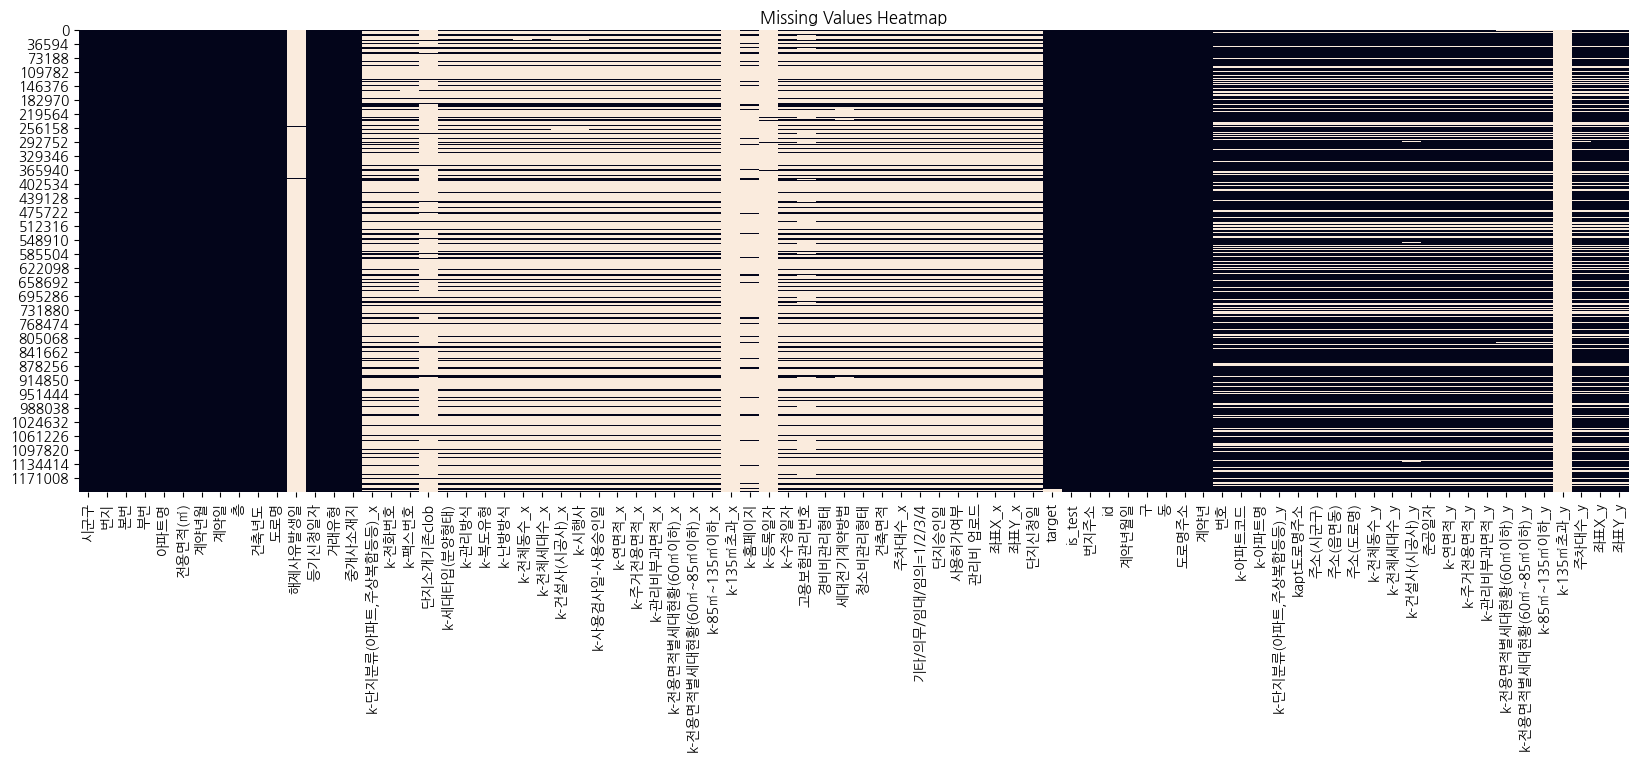

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
train_test[train_test.is_test==0].target.isna().sum()

0

In [ ]:
train_test_seoul_apart.columns

In [7]:
train_test_seoul_apart.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test', '번지주소', 'id', '계약년월일', '구',
       '동', '도로명주소', '계약년'],
      dtype='object')

# 역 WGS1984  
https://business.juso.go.kr/addrlink/elctrnMapProvd/geoDBDwldList.do?menu=%EC%82%AC%EB%AC%BC%EC%A3%BC%EC%86%8C%20%EC%8B%9C%EC%84%A4%20%EA%B8%B0%EC%A4%80%EC%A0%90#this

In [5]:
train_test.좌표X.isna().sum()

876232

In [4]:
train_test_seoul_apart.좌표X_y.isna().sum()

273097

In [26]:
df.좌표X_y.isna().sum()

260767

In [ ]:
import numpy as np

subset = train_test_seoul_apart[['도로명주소','좌표X_y','좌표Y_y']].drop_duplicates() # 9334

# 버스 정류장 데이터
real_estate = pd.DataFrame({
    'Property_ID': subset.도로명주소,
    'X': subset.좌표X_y,
    'Y': subset.좌표Y_y,
})

Bus_stations = pd.DataFrame({
    'Bus_Station_ID': bus_feature['노드 ID'],
    'Station_Name': bus_feature.정류소명,
    'X': bus_feature.X좌표,
    'Y': bus_feature.Y좌표,
})

# 지하철 정류장 데이터
subway_stations = pd.DataFrame({
    'Subway_Station_ID': subway_feature.역사_ID,
    'Station_Name': subway_feature.역사명,
    'X': subway_feature.경도,
    'Y': subway_feature.위도,
})

def haversine_np(lon1, lat1, lon2, lat2):
    """Calculate the great circle distance between two points on the earth (specified in decimal degrees)"""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c  # Multiply by Earth radius to get kilometers
    return km

# 가장 가까운 정류소 계산
def calculate_nearest_station(real_estate, stations):
    min_distances = []
    nearest_station_names = []
    for index, real in real_estate.iterrows():
        distances = haversine_np(real['X'], real['Y'], stations['X'].values, stations['Y'].values)
        min_index = distances.argmin()
        min_distances.append(distances[min_index])
        nearest_station_names.append(stations.iloc[min_index]['Station_Name'])
    return min_distances, nearest_station_names

# 버스 정류장
min_distances, nearest_station_names = calculate_nearest_station(real_estate, Bus_stations)
real_estate['Nearest_Bus_Station_Distance'] = min_distances
real_estate['Nearest_Bus_Station_Name'] = nearest_station_names

# 지하철역
min_distances, nearest_station_names = calculate_nearest_station(real_estate, subway_stations)
real_estate['Nearest_Subway_Station_Distance'] = min_distances
real_estate['Nearest_Subway_Station_Name'] = nearest_station_names

print(real_estate.head(1))


In [121]:
real_estate.head(5)

,Property_ID,X,Y,Nearest_Bus_Station_Distance,Nearest_Bus_Station_Name,Nearest_Subway_Station_Distance,Nearest_Subway_Station_Name
0,서울특별시 강남구 언주로 3,127.06,37.48,0.06,개포우성아파트,1.13,구룡
12,서울특별시 강남구 개포로 307,127.06,37.48,0.10,우성3차아파트,0.41,구룡
25,서울특별시 강남구 개포로109길 69,127.08,37.50,0.20,코원에너지서비스,0.40,대청
38,서울특별시 강남구 개포로 310,127.06,37.48,0.23,개포주공1단지아파트,0.76,구룡
39,서울특별시 강남구 개포로 310,127.06,37.48,0.23,개포주공1단지아파트,0.73,구룡


In [122]:
real_estate.to_csv(r'C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\station_distance.csv', index=False)

# 모두 연결해서 테스트해보기

In [5]:
seoul_apart.columns

Index(['번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)',
       '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y'],
      dtype='object')

In [10]:
match_build_seoul

,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,94,0.1,03047,1111010100101440003031291,Unnamed: 11,근린생활시설,1111051500,청운효자동,1,0.2,0.3,1.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,0.4,953243.01328,1954025.806161,953241.683263,1954023.466812,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1.2,Unnamed: 32
0,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,96,0,3047,1111010100101080014031432,평안빌,주택,1.111052e+09,청운효자동,4,0,2,1,NaN,NaN,NaN,1,953247.695696,1.954041e+06,953243.258151,1.954034e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
1,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,98,0,3047,1111010100101080013031431,청운빌라,주택,1.111052e+09,청운효자동,4,1,2,1,에이동,NaN,NaN,1,953248.552199,1.954060e+06,953240.877646,1.954055e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
2,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,3,3032,1111010100101340002031304,풍림팍사이드빌라,주택,1.111052e+09,청운효자동,4,1,2,2,NaN,NaN,NaN,1,953194.413607,1.954068e+06,953195.459364,1.954079e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
3,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,3,3032,1111010100101340002031311,풍림팍사이드빌라,주택,1.111052e+09,청운효자동,0,0,2,2,NaN,NaN,NaN,1,953183.480942,1.954081e+06,953195.459364,1.954079e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
4,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,4,3032,1111010100101300002031300,경복빌라,주택,1.111052e+09,청운효자동,3,1,0,2,NaN,NaN,NaN,1,953188.419102,1.954103e+06,953193.346779,1.954097e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599937,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,49,0,5200,1174011000101590000000001,NaN,농축수산시설,1.174052e+09,강일동,1,0,0,1,NaN,NaN,NaN,0,970445.820829,1.952917e+06,970450.233824,1.952919e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN
599938,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,52,0,5200,1174011000101550015000001,NaN,주택,1.174052e+09,강일동,3,0,0,1,NaN,NaN,NaN,1,970406.271770,1.952959e+06,970400.569397,1.952952e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN
599939,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,57,0,5200,1174011000101580003000001,NaN,농축수산시설,1.174052e+09,강일동,1,0,0,1,NaN,NaN,NaN,0,970457.187938,1.952895e+06,970433.538895,1.952889e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN
599940,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,59,0,5200,1174011000101760002000001,NaN,농축수산시설,1.174052e+09,강일동,1,0,0,1,NaN,NaN,NaN,0,970480.771663,1.952885e+06,970456.383107,1.952880e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN


In [ ]:
train_test[train_test.도로명주소.str.contains('진관3로 77')==True]

In [ ]:
train_test[train_test.아파트명.str.contains('한화꿈에')==True]

In [18]:
seoul_apart.columns

Index(['번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)',
       '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', None)
seoul_apart.head(3)

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
0,1,A15679103,우리유앤미,아파트,서울특별시 동작구 서달로 83,동작구,흑석동,서달로,2,206,우리건설,2003-12-26,27097.0,15827.0,20098.0,89.0,93.0,24.0,NaN,223.0,126.9596386,37.500668
1,2,A13876112,송파파인타운13단지,아파트,서울특별시 송파구 송파대로8길 10,송파구,장지동,송파대로8길,4,197,양우건설(주),2011-01-27,30646.0,16720.0,22520.0,0.0,197.0,0.0,NaN,225.0,127.1291789,37.476897
2,3,A13873701,오금현대백조(임대),아파트,서울특별시 송파구 양재대로72길 20,송파구,오금동,양재대로72길,1,153,현대건설,1997-01-24,7318.0,4743.0,4743.0,153.0,0.0,0.0,NaN,60.0,127.1287745,37.508906


In [ ]:
'id', '계약년월일', '구', '동', '도로명주소', '층', 

In [ ]:
df = pd.merge(train_test, seoul_apart, left_on='도로명주소', right_on='kapt도로명주소', how='left')